In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay


In [2]:
# Load the dataset
data = pd.read_csv('insurance.csv')

# Identify numeric and categorical columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessor for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Define and train the Gradient Boosting model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [4]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 18732863.283815846
R-squared: 0.8793364486536337


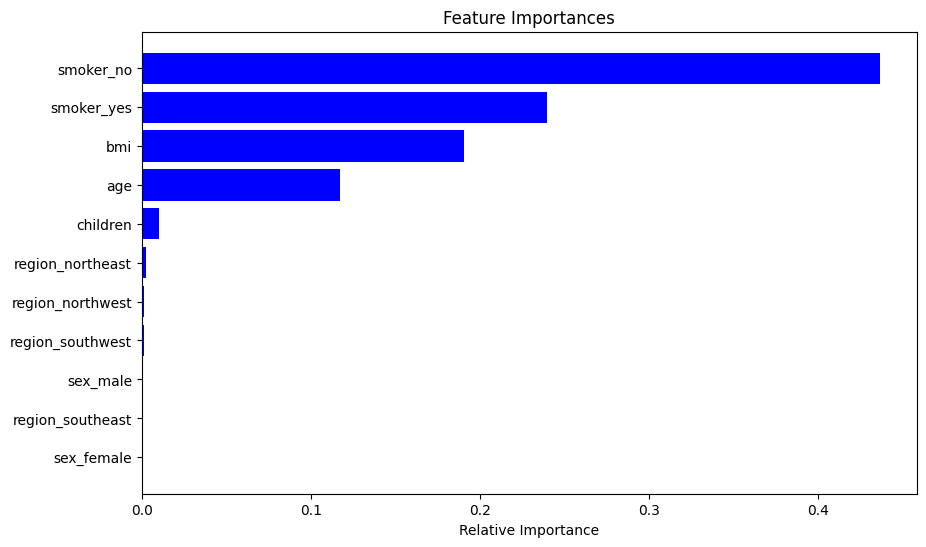

In [5]:
# Extract feature importances from the model
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
feature_importances = model.named_steps['regressor'].feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


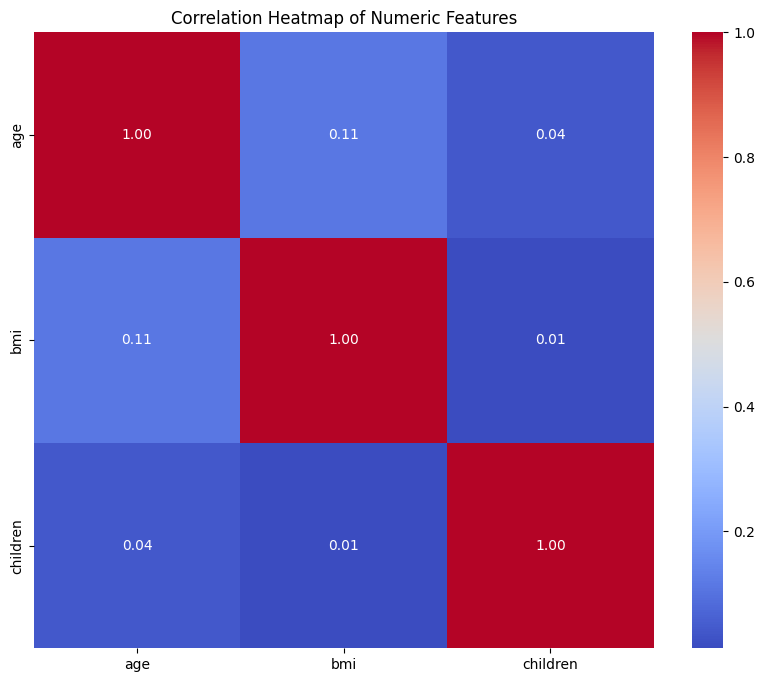

In [6]:
# Plotting a heatmap of correlations among numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


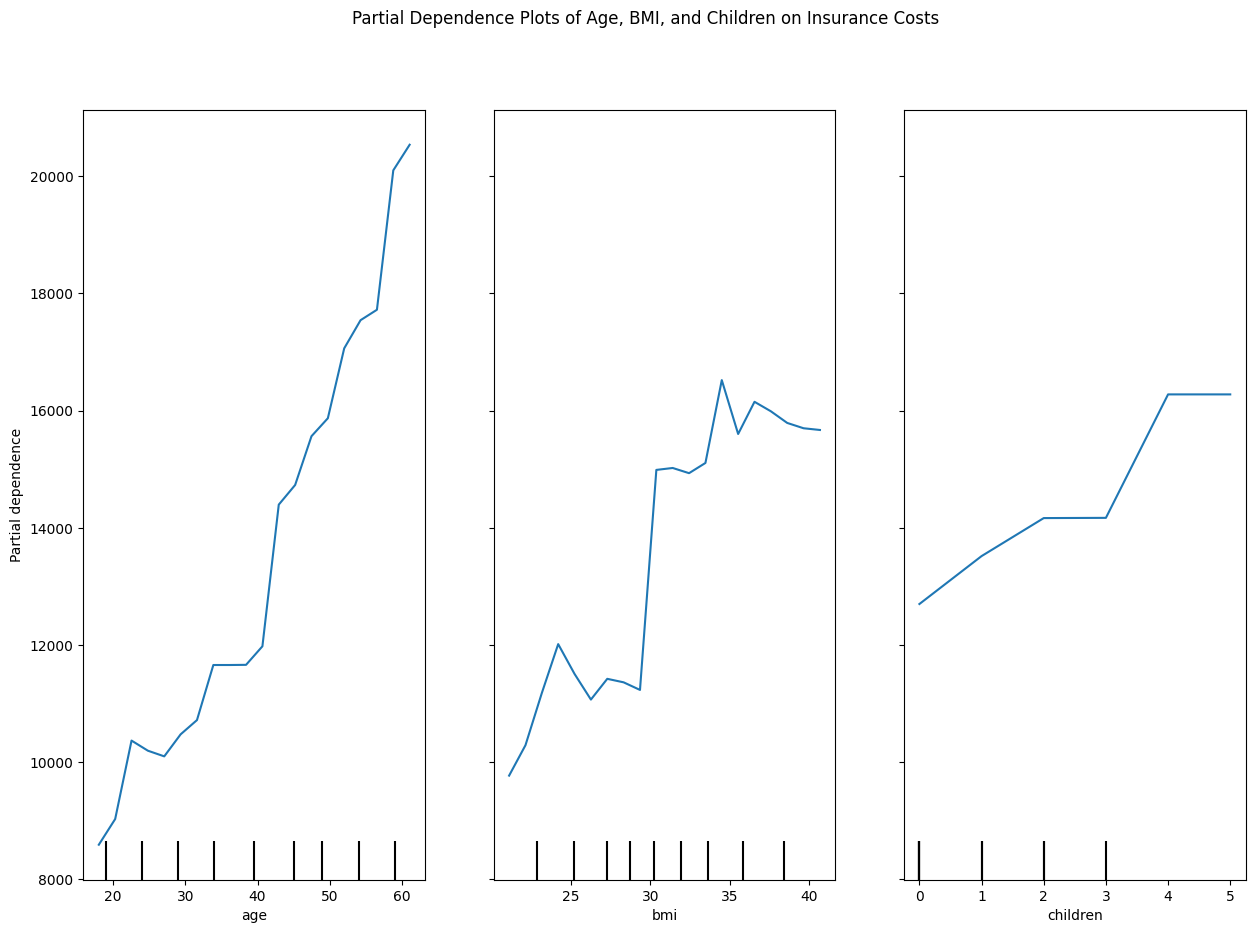

In [7]:
# Plotting Partial Dependence Plots for some features
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(model, X_train, features=['age', 'bmi', 'children'], ax=ax, grid_resolution=20)
plt.suptitle('Partial Dependence Plots of Age, BMI, and Children on Insurance Costs')
plt.show()


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Data Acquisition and Pre-processing
# Load the dataset
data = pd.read_csv('insurance.csv')

# Check for missing values and data types
print(data.info())
print(data.head())

# Identifying numeric and categorical columns for preprocessing
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Creating transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preparing the features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development and Selection
# Integrating the preprocessor with a GBM regressor into a full pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)



In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Interpretation and Analysis of Model Results
# Feature Importance Visualization
feature_importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1]\
                                        .named_steps['onehot'].get_feature_names_out(categorical_features))


In [ ]:
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Predicting Medical Costs')
plt.barh(range(len(indices)), feature_importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [ ]:
# Correct way to extract feature names after one-hot encoding
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features))
print(feature_names)  # This will help you see all the feature names, including those generated for categorical variables



In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Confirming correct feature names directly
features = ['age', 'bmi', 'children', 'smoker_yes']  # Example features as listed

fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    model, X_train, features=features, ax=ax, feature_names=['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
)
plt.suptitle('Partial Dependence Plots on Key Features')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('insurance.csv')

# Identify numeric and categorical columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessor for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Gradient Boosting model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Model Training
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Hyperparameter Tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R-squared: {best_r2}')


Mean Squared Error: 18732863.283815846
R-squared: 0.8793364486536337
Best Mean Squared Error: 18516292.191308457
Best R-squared: 0.8807314429342721


Mean Squared Error: 18732863.283815846
R-squared: 0.8793364486536337
             Feature  Importance
5          smoker_no    0.436574
6         smoker_yes    0.239912
1                bmi    0.190694
0                age    0.116947
2           children    0.010163
7   region_northeast    0.002415
8   region_northwest    0.001418
10  region_southwest    0.001008
4           sex_male    0.000471
9   region_southeast    0.000231
3         sex_female    0.000167
Best parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best cross-validation score (MSE): 21585994.512234174
Best Mean Squared Error: 18516292.191308457
Best R-squared: 0.8807314429342721


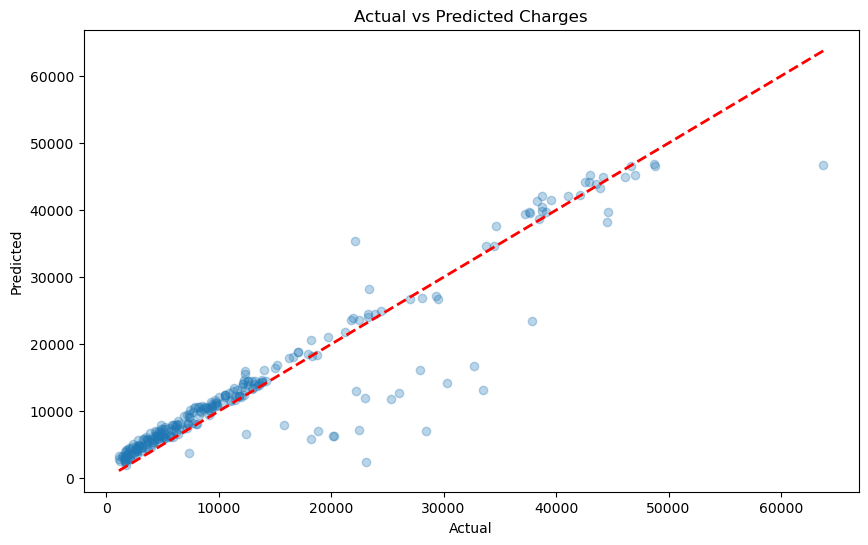

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


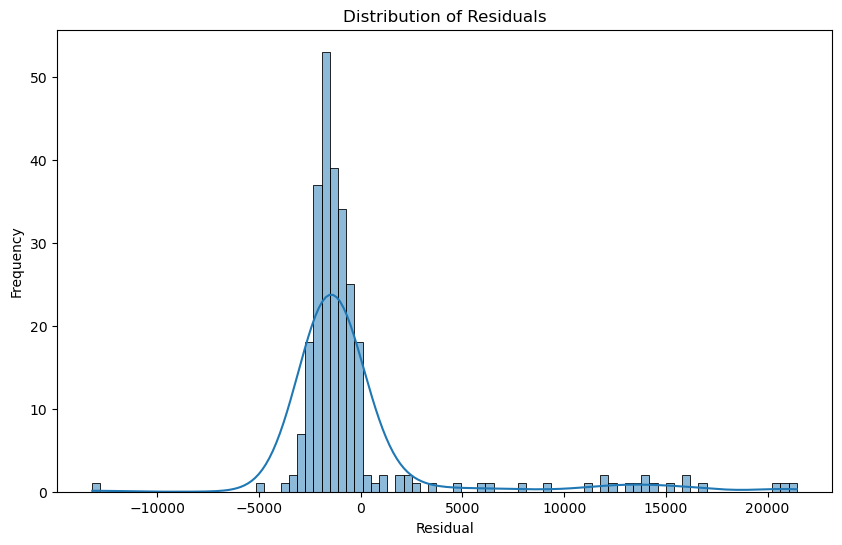

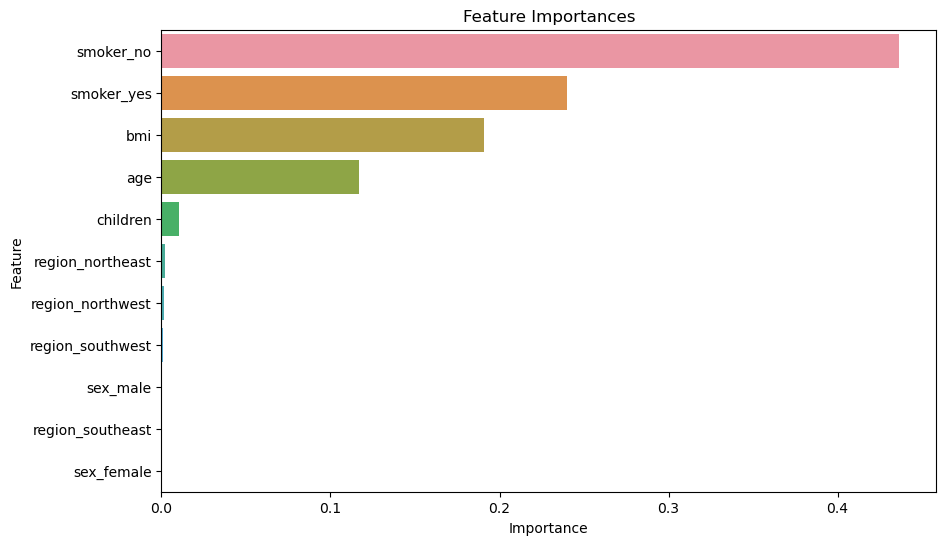

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('insurance.csv')

# Identify numeric and categorical columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Gradient Boosting model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance
feature_importances = model.named_steps['regressor'].feature_importances_
features = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Hyperparameter tuning with Grid Search
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score (MSE): {-grid_search.best_score_}')

# Re-evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R-squared: {best_r2}')

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Charges')
plt.show()

# Distribution of residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Feature importances bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Mean Squared Error: 18732863.283815846
R-squared: 0.8793364486536337
             Feature  Importance
5          smoker_no    0.436574
6         smoker_yes    0.239912
1                bmi    0.190694
0                age    0.116947
2           children    0.010163
7   region_northeast    0.002415
8   region_northwest    0.001418
10  region_southwest    0.001008
4           sex_male    0.000471
9   region_southeast    0.000231
3         sex_female    0.000167
Best parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best cross-validation score (MSE): 21585994.512234174
Best Mean Squared Error: 18516292.191308457
Best R-squared: 0.8807314429342721


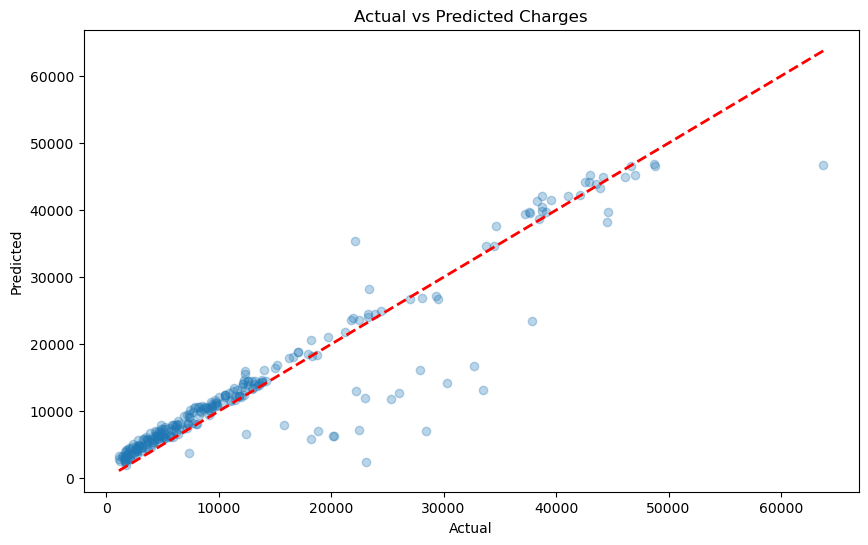

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


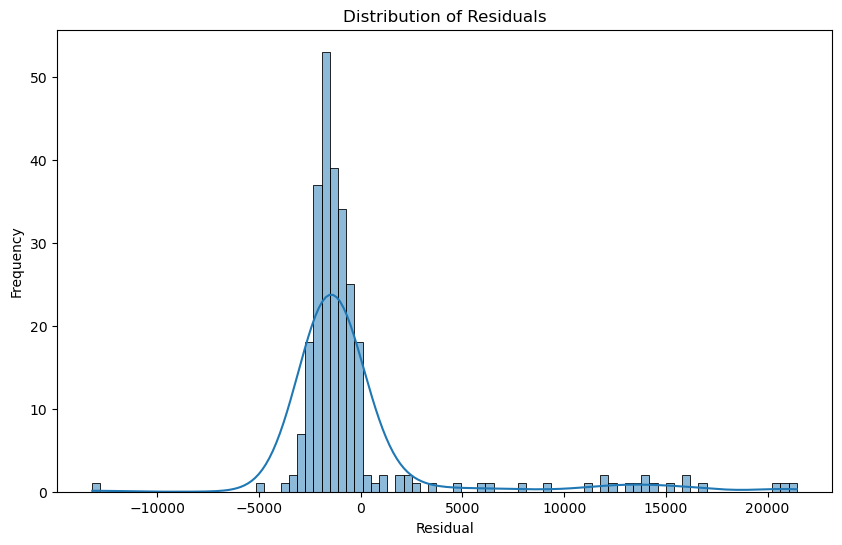

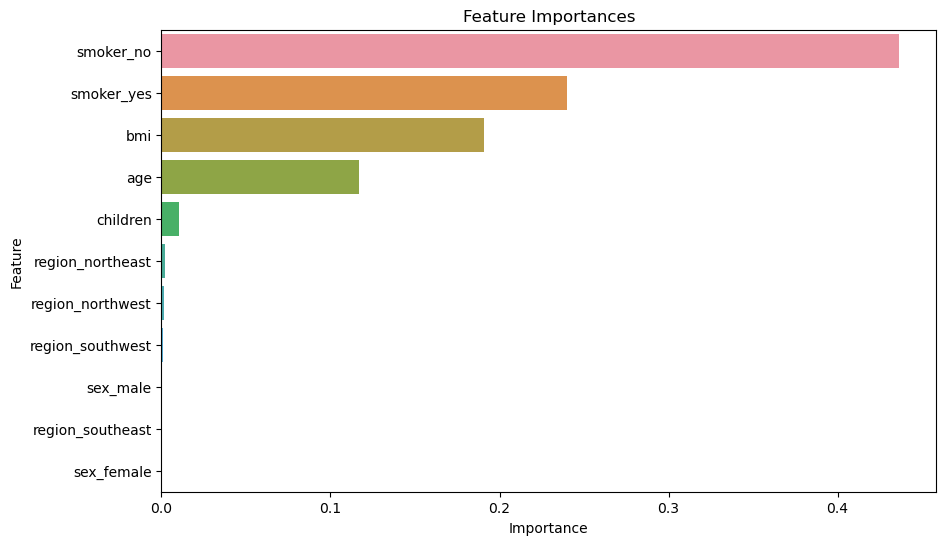

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('insurance.csv')

# Identify numeric and categorical columns
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Gradient Boosting model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance
feature_importances = model.named_steps['regressor'].feature_importances_
features = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Hyperparameter tuning with Grid Search
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score (MSE): {-grid_search.best_score_}')

# Re-evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R-squared: {best_r2}')

# Remove infinities and NaNs from data before plotting
def clean_array(data):
    return data[np.isfinite(data)]

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(clean_array(y_test), clean_array(y_pred_best), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Charges')
plt.show()

# Distribution of residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(clean_array(residuals), kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Feature importances bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=clean_array(importance_df['Importance']), y=importance_df['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
